# Projet Classification de données hyperspectrales

Les images hyperspectrales sont un type de données que vous avez déjà traitées dans un précédent TP, et qui correspondent à des images dont le contenu spectral est enrichi. L'objectif de ce mini-projet est une compétition (entre vous) pour la classification des pixels d'une image hyperspectrale.



Vous allez avoir à disposition une image hyperspectrale (survol de l'Université de pavie), et votre objectif est de déterminer automatiquement la nature des pixels qui composent l'image.

On commence par charger l'image et quelques imports utiles


In [1]:
import numpy as np
from scipy.io import loadmat
import pylab as pl

import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras import optimizers

In [2]:
pavia = np.load('pavia.npy')

dont voici les dimensions


In [3]:
pavia.shape

(610, 340, 103)

Voici un aperçu de cette image (on choisit 3 bandes spectrales parmi les 103 pour simuler le bleu, vert et rouge)

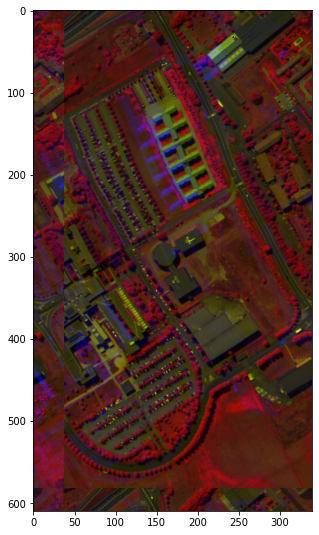

In [4]:
nbands=[100,50,10]

pl.figure(figsize=(5,10))
pl.imshow(pavia[:,:,nbands])
pl.show()

Je donne en plus de cette image une série de labels correspondant à la classe associée à certains pixels


(610, 340)


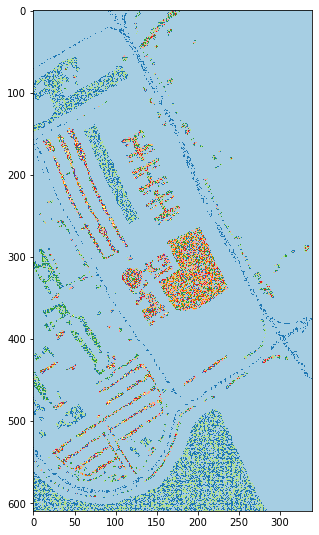

In [5]:
pavia_vt = np.load('train_set.npy')
print(pavia_vt.shape)
pl.figure(figsize=(5,10))
pl.imshow(pavia_vt,cmap='Paired')
pl.show()

Vous noterez que **la classe 0 correspond à tous les pixels à étiquetter**




L'objectif est que vous obteniez la classe de tous les autres pixels en utilisant un réseau de neurones que vous designerez selon votre choix. L'objectif est d'obtenir les meilleures performances sur ce jeu de données, aussi vous penserez à découper votre jeu de données d'entrainement en jeux de train/validation. Je vous laisse toute latitude sur ces choix. 



En plus du notebook contenant votre code, vous me remettrez un fichier dont la structure est équivalente à celle de 'train_set.npy', contenant une des 9 neufs classes numérotées de 1 à 9 **pour chaque pixel**  (un espace de rendu sera disponible dans l'ENT).

In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(pavia,pavia_vt,test_size=0.10)

In [7]:
print(X_test.shape)
print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)

tab1 = np.argwhere(Y_train!=0)
x_train_trie = np.array([X_train[i[0]][i[1]] for i in tab1])
y_train_trie = keras.utils.to_categorical([Y_train[i[0]][i[1]] for i in tab1])


tab2 = np.argwhere(Y_test!=0)
x_test_trie = np.array([X_test[i[0]][i[1]] for i in tab2])
y_test_trie = keras.utils.to_categorical([Y_test[i[0]][i[1]] for i in tab2])

(61, 340, 103)
(549, 340, 103)
(549, 340)
(61, 340)


## Le reseau de neurone

### Model

In [8]:
N = x_train_trie.shape[1]
H = 130 # couche cachee
K = 10 #couche sortie

model = Sequential()
#model.add(Flatten())
model.add(Dense(H, input_dim=N))
model.add(Activation("relu"))
model.add(Dense(300))
model.add(Activation("tanh"))
model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dense(300))
model.add(Activation("tanh"))
model.add(Dense(K))
model.add(Activation("softmax"))

### Entrainement

In [9]:
model.compile(optimizer=optimizers.Adadelta(learning_rate=0.1,  rho=0.99), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_trie, y_train_trie, epochs=100, batch_size=256) # batch_size nb sample qu'on passe

Epoch 1/100
76/76 [==============================] - 1s 8ms/step - loss: 1.5211 - accuracy: 0.4797
Epoch 2/100
76/76 [==============================] - 1s 8ms/step - loss: 1.3201 - accuracy: 0.5399
Epoch 3/100
76/76 [==============================] - 1s 8ms/step - loss: 1.2290 - accuracy: 0.5691
Epoch 4/100
76/76 [==============================] - 1s 8ms/step - loss: 1.1747 - accuracy: 0.5831
Epoch 5/100
76/76 [==============================] - 1s 8ms/step - loss: 1.1292 - accuracy: 0.5904
Epoch 6/100
76/76 [==============================] - 1s 8ms/step - loss: 1.0990 - accuracy: 0.6019
Epoch 7/100
76/76 [==============================] - 1s 8ms/step - loss: 1.0676 - accuracy: 0.6164
Epoch 8/100
76/76 [==============================] - 1s 8ms/step - loss: 1.0355 - accuracy: 0.6298
Epoch 9/100
76/76 [==============================] - 1s 8ms/step - loss: 1.0089 - accuracy: 0.6388
Epoch 10/100
76/76 [==============================] - 1s 8ms/step - loss: 0.9926 - accuracy: 0.6479
Epoch 11/

### Prediction
Attendu 0.9 pour train <br>
Meilleur résultat : 0.8598

In [10]:
results = model.evaluate(x_test_trie, y_test_trie, batch_size=256)

9/9 [==============================] - 0s 3ms/step - loss: 0.8762 - accuracy: 0.7171


In [11]:
predictions = model.predict(pavia)

print(predictions.shape)

tab = []
m,d,u = predictions.shape
for i in range(m):
  colonne = []
  for j in range(d):
    colonne.append(np.argmax(predictions[i][j]))
  tab.append(colonne)
tab = np.asarray(tab)

(610, 340, 10)


### Affichage

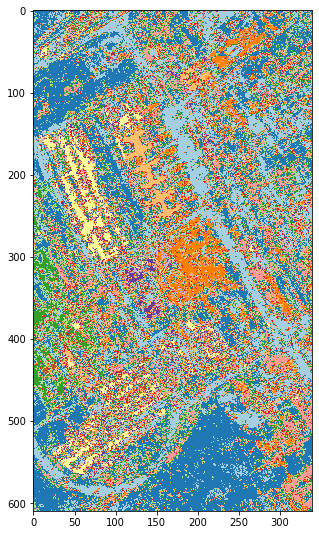

In [12]:
pl.figure(figsize=(5,10))
pl.imshow(tab,cmap='Paired')
pl.show()

### Ecriture fichier


In [13]:
np.save('result_SLB.npy', tab)